<a href="https://colab.research.google.com/github/moronjie/finalYearProject/blob/main/finalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Augmented Images/Augmented Images/Others_augmented/NM04_01_13.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_00.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_01.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_02.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_03.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_04.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_05.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_06.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_07.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_08.jpg  
  inflating: Augmented Images/Augmented Images/Others_augmented/NM05_01_09.jpg  
  inflating: Augmented Images/Augmented Images/Others_augm

In [52]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16,Xception,MobileNetV2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [82]:
# Specify the directory containing your small dataset
dataset_directory = '/content/Fold1/Fold1/Fold1'

# Specify the target image dimensions
image_width, image_height = 150, 150

# Specify the batch size and number of epochs
batch_size = 10
num_epochs = 100

In [83]:
# Create data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2451 images belonging to 3 classes.
Found 611 images belonging to 3 classes.


In [84]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(image_width, image_height, 3)
)
#VGG16(
#    include_top=True,
#    weights="imagenet",
#    input_tensor=None,
#    input_shape=None,
#    pooling=None,
#    classes=1000,
#    classifier_activation="softmax",
#)



In [85]:
# Freeze the base model layers
base_model.trainable = False

# Build the model with VGG16 base and custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [86]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100
245/245 [==============================] - 26s 93ms/step - loss: -769.6985 - accuracy: 0.8394 - val_loss: -3267.5969 - val_accuracy: 0.8410
Epoch 2/100
245/245 [==============================] - 23s 95ms/step - loss: -12392.9922 - accuracy: 0.8410 - val_loss: -25603.2031 - val_accuracy: 0.8410
Epoch 3/100
245/245 [==============================] - 24s 97ms/step - loss: -51004.4062 - accuracy: 0.8410 - val_loss: -86731.6328 - val_accuracy: 0.8410
Epoch 4/100
245/245 [==============================] - 23s 93ms/step - loss: -139592.8438 - accuracy: 0.8406 - val_loss: -213641.5938 - val_accuracy: 0.8410
Epoch 5/100
245/245 [==============================] - 22s 89ms/step - loss: -301645.2812 - accuracy: 0.8402 - val_loss: -415482.9062 - val_accuracy: 0.8410
Epoch 6/100
245/245 [==============================] - 24s 98ms/step - loss: -535105.4375 - accuracy: 0.8410 - val_loss: -700627.5625 - val_accuracy: 0.8410
Epoch 7/100
245/245 [==============================] - 23s 93ms/ste

In [87]:
# creating a test_generator for my final evaluation
test_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 3062 images belonging to 3 classes.


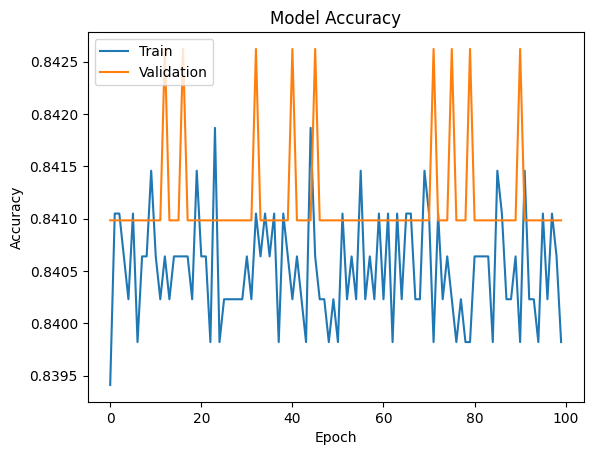

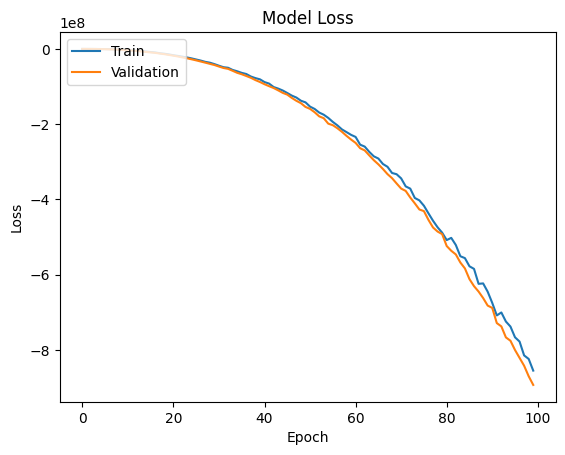

In [88]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

307/307 [==============================] - 23s 76ms/step - loss: -869741824.0000 - accuracy: 0.8406
Test Loss: -869741824.0
Test Accuracy: 0.8406270146369934


In [90]:
# Calculate recall and precision
test_true = test_generator.classes
test_pred = model.predict(test_generator)
test_pred_binary = (test_pred > 0.5).astype(int).flatten()

# Compute precision
precision = precision_score(test_true, test_pred, average='micro')

# Compute recall
recall = recall_score(test_true, test_pred, average='micro')

print('Recall:', recall)
print('Precision:', precision)

307/307 [==============================] - 25s 80ms/step
Recall: 0.8406270411495754
Precision: 0.8406270411495754
